# Lab 6: Unsupervised Learning

The notebook is partially based on the ISLP notebook.

In this lab we demonstrate PCA and clustering on the dataset that we used in previous labs.

First, we import some libraries at this top
level. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import \
     (KMeans,
      AgglomerativeClustering)

from sklearn.metrics import rand_score, adjusted_rand_score

We use the whole dataset, without splitting it into train/dev/test subsets.

In [27]:
data = pd.read_csv('data.csv', sep=';')
data.value_counts('Target')

Target
Graduate    2209
Dropout     1421
Enrolled     794
dtype: int64

## Principal Components Analysis

First, we normilize the data.

In [13]:
X = data.drop('Target', axis=1)
scaler = StandardScaler(with_std=True,
                        with_mean=True)
data_scaled = scaler.fit_transform(X)

Having scaled the data, we can then
perform principal components analysis using the `PCA()` transform
from the `sklearn.decomposition` package.

In [16]:
pca = PCA()
pca.fit(data_scaled)
scores = pca.transform(data_scaled)

We can visualize the data using first two principal components, the color corresponds to the class label (target variable).

Text(0, 0.5, 'PC2')

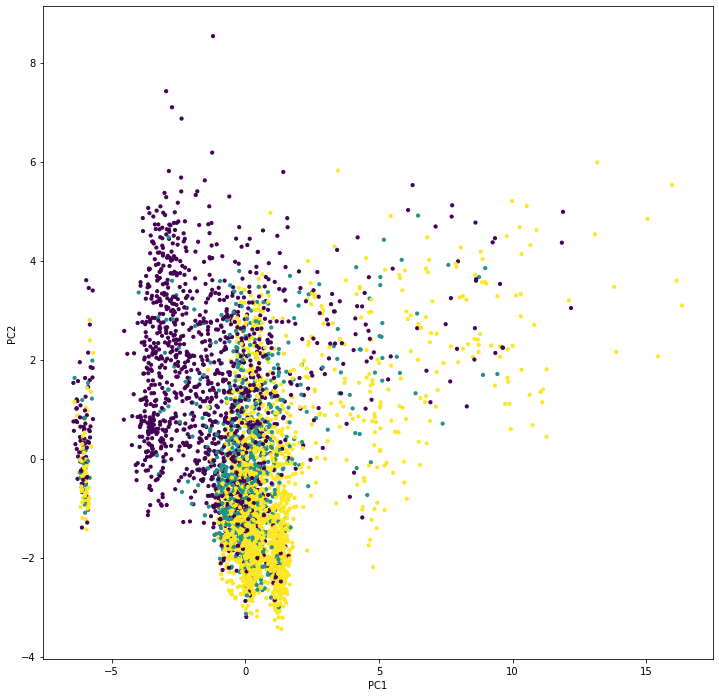

In [18]:
label2number = {'Dropout': 1, 'Enrolled': 2, 'Graduate': 3}
colors = [label2number[s] for s in data['Target']]

i, j = 0, 1 # which components
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.scatter(scores[:,0], scores[:,1], s=10, c=colors)
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))

## Clustering

### $K$-Means Clustering

The estimator `sklearn.cluster.KMeans()`  performs $K$-means clustering ($K = 5$).  

In [45]:
kmeans = KMeans(n_clusters=3, n_init=20).fit(X)

Now we visualize the resulting clustering (this time *clusters* are color-coded).

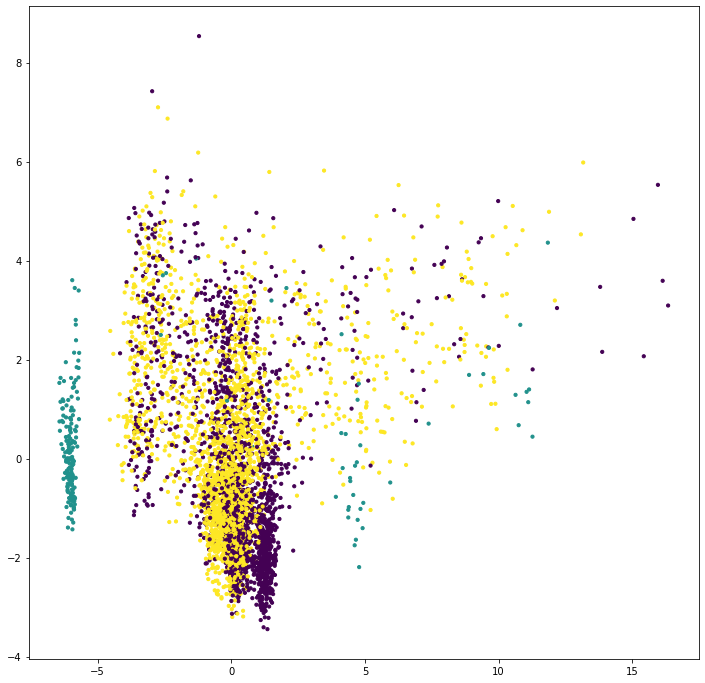

In [41]:
i, j = 0, 1 # which components
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.scatter(scores[:,0], scores[:,1], s=10, c=kmeans.labels_)

Rand and adjusted Rand indices for the obtained clusters.

In [34]:
print('Rand index: %.4f' % rand_score(data['Target'],kmeans.labels_))
print('Adjusted Rand index: %.4f' % adjusted_rand_score(data['Target'],kmeans.labels_))

Rand index: 0.6145
Adjusted Rand index: 0.0067


### Hierarchical Clustering

The `AgglomerativeClustering()`  class from
the `sklearn.clustering` package implements hierarchical clustering.

In [42]:
hc_comp = AgglomerativeClustering (n_clusters=3,
                                   metric='manhattan',
                                   linkage='complete')
hc_comp.fit(X)

AgglomerativeClustering(linkage='complete', metric='manhattan', n_clusters=3)

As in the previous example, we visualize the results and evaluate them using Rand indices.

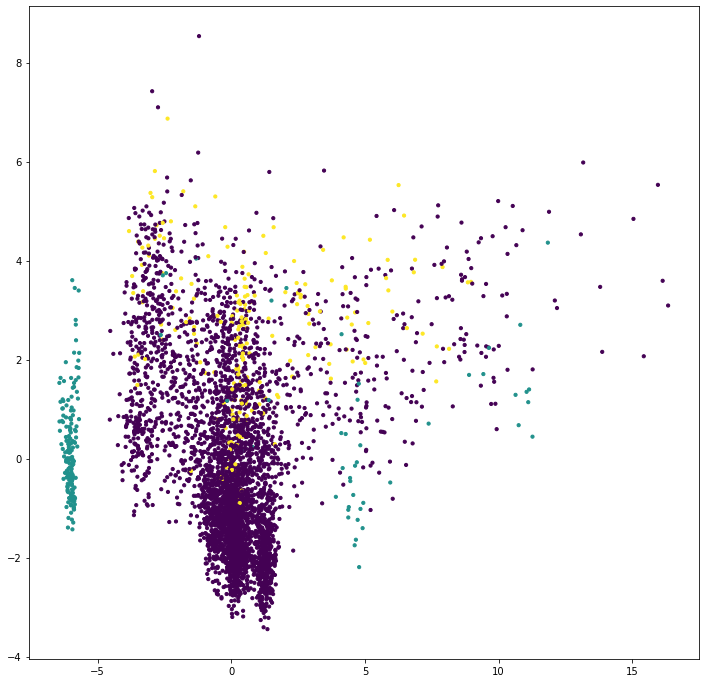

In [43]:
i, j = 0, 1 # which components
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.scatter(scores[:,0], scores[:,1], s=10, c=hc_comp.labels_)

In [44]:
print('Rand index: %.4f' % rand_score(data['Target'],hc_comp.labels_))
print('Adjusted Rand index: %.4f' % adjusted_rand_score(data['Target'],hc_comp.labels_))

Rand index: 0.4255
Adjusted Rand index: -0.0031
